In [1]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np

圓環幾何架構建立：做出兩個圓柱，將其中的圓柱n=1重疊至較大的圓柱，達到中空的效果

In [18]:
n    = 3.4 #波導折射率
w    = 1 #波導的厚度
r    = 1 #圓環的厚度
pad  = 4 # 波島與PML的距離
dpm1 = 2 #PML厚度
cell = 2 * (r + w + pad + dpm1) #模擬範圍

c1 = mp.Cylinder(radius = r + w, material = mp.Medium(index=n))
c2 = mp.Cylinder(radius = r)

光源：GaussianSource

In [19]:
fcen = 0.15 #中心頻率
df = 0.1 # 頻率寬度
sources = mp.Source(mp.GaussianSource(fcen,fwidth = df),mp.Ez,mp.Vector3(r+0.1))

In [24]:
sim = mp.Simulation(cell_size =mp.Vector3(cell,cell),
                    geometry = [c1,c2],
                    sources = [sources],
                    resolution = 10,
                    boundary_layers = [mp.PML(dpm1),]
                    )

     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.56,11.56,11.56)
     cylinder, center = (0,0,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


<function matplotlib.pyplot.show(close=None, block=None)>

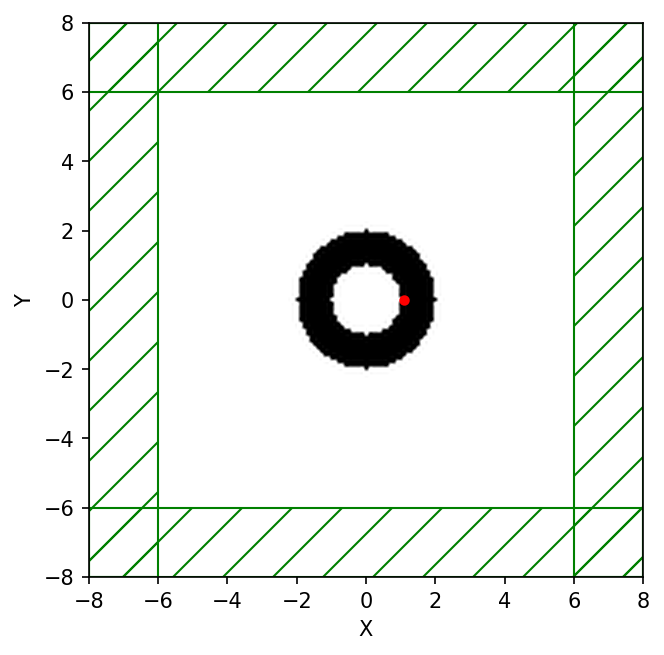

In [25]:
plt.figure(dpi = 150)
sim.plot2D()
plt.show